# **a) Dimensionality Reduction Techniques on Text Data**

Import libraries and set plot styles

In [ ]:
%matplotlib inline

from sklearn.datasets import load_diabetes

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.manifold import LocallyLinearEmbedding, TSNE, Isomap
import umap

plt.style.use('ggplot')

Get and prepare data

In [ ]:
diabetes = load_diabetes()
df = pd.DataFrame(data = diabetes.data, columns = diabetes.feature_names)

In [ ]:
df.shape

(442, 10)

In [ ]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


The full dataset contains 30 columns and 569 observations

In [ ]:
df.shape

(442, 10)

# **1) PCA - Principal Component Analysis**

Apply PCA

Obtain the feature matrix

In [ ]:
X = df.values
X.shape #it's 2D numpy array

(442, 10)

Standardize Features


In [ ]:
#create the object
scaler =  StandardScaler()

#calculate the mean and standard deviation
scaler.fit(X)

#transform the values
X_scaled = scaler.transform(X)

Choose the right number of dimensions (k)

First, apply PCA to all 30 features to check how well PCA captures the variance of the data.

In [ ]:
pca_10 = PCA(n_components = 10, random_state = 2020)
pca_10.fit(X_scaled)
X_pca_10 = pca_10.transform(X_scaled)

In [ ]:
print('Variance of all 30 features = ', sum(pca_10.explained_variance_ratio_*100))

Variance of all 30 features =  100.0


Text(0, 0.5, 'Explained Variance')

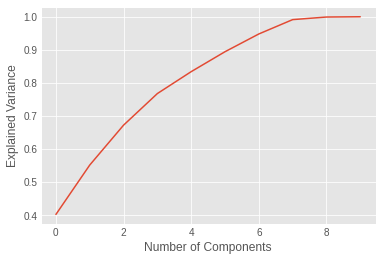

In [ ]:
plt.plot(np.cumsum(pca_10.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
#plt.savfig('elbow_plot.png', dpi = 100)

In [ ]:
print('Variance explained by the First PCs = ', np.cumsum(pca_10.explained_variance_ratio_ * 100)[0])
print('Variance explained by the First 2 PCs = ', np.cumsum(pca_10.explained_variance_ratio_ * 100)[1])
print('Variance explained by the First 5 PCs = ', np.cumsum(pca_10.explained_variance_ratio_ * 100)[4])
print('Variance explained by the First 10 PCs = ', np.cumsum(pca_10.explained_variance_ratio_ * 100)[9])

Variance explained by the First PCs =  40.24214175678765
Variance explained by the First 2 PCs =  55.16532410893229
Variance explained by the First 5 PCs =  83.40156689459845
Variance explained by the First 10 PCs =  100.0


Apply PCA by setting n_components = 2

In [ ]:
pca_2 = PCA(n_components = 2, random_state = 2020)
pca_2.fit(X_scaled)
X_pca_2 = pca_2.transform(X_scaled)

Create a 2D scatter plot with 2 principal components

Text(0, 0.5, 'Second Principal Component')

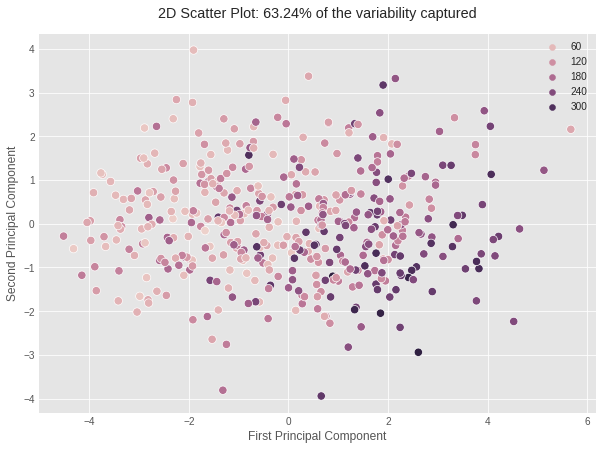

In [ ]:
plt.figure(figsize = (10, 7))
sns.scatterplot(x = X_pca_2[:, 0], y = X_pca_2[:, 1], s = 70, hue = diabetes.target)

plt.title('2D Scatter Plot: 63.24% of the variability captured', pad = 15)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

Reference: https://towardsdatascience.com/principal-component-analysis-pca-with-scikit-learn-1e84a0c731b0

# **2) SVD - Single Value Decomposition**

In [ ]:
X = df.values
X.shape

(442, 10)

In [ ]:
#Fitting the data in SVD class with 2 features
trun_svd =  TruncatedSVD(n_components = 9)
svd_9 = trun_svd.fit_transform(X)

In [ ]:
 #Printing the transformed matrix
print("Transformed Matrix:")
print(svd_9[:3])

Transformed Matrix:
[[ 0.02793062 -0.09260116  0.02802696 -0.00393895 -0.01220663 -0.04809855
  -0.00855256  0.03602797 -0.00861296]
 [-0.13468605  0.06526341  0.00132778 -0.02235559 -0.00681271 -0.04818421
   0.01067428 -0.00896163  0.0240261 ]
 [ 0.01294474 -0.07776417  0.0351635  -0.03764663 -0.05535734 -0.05293076
  -0.02199441  0.0401086  -0.00120629]]


In [ ]:
print('Variance of all 30 features = ', sum(trun_svd.explained_variance_ratio_*100))

Variance of all 30 features =  99.9143947009897


Text(0, 0.5, 'Explained Variance')

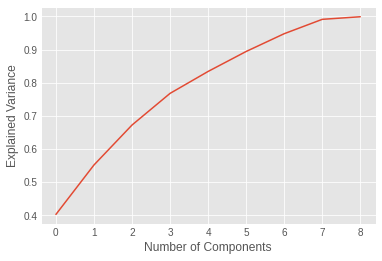

In [ ]:
plt.plot(np.cumsum(trun_svd.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')

In [ ]:
print('Variance explained by the First PCs = ', np.cumsum(trun_svd.explained_variance_ratio_ * 100)[0])
print('Variance explained by the First 2 PCs = ', np.cumsum(trun_svd.explained_variance_ratio_ * 100)[1])
print('Variance explained by the First 5 PCs = ', np.cumsum(trun_svd.explained_variance_ratio_ * 100)[4])
print('Variance explained by the First 10 PCs = ', np.cumsum(trun_svd.explained_variance_ratio_ * 100)[8])

Variance explained by the First PCs =  40.24214175678736
Variance explained by the First 2 PCs =  55.16532410893157
Variance explained by the First 5 PCs =  83.40156689459762
Variance explained by the First 10 PCs =  99.9143947009897


Apply SVD by setting n_components = 2

In [ ]:
trun_svd =  TruncatedSVD(n_components = 2)
A_transformed = trun_svd.fit_transform(df)

In [ ]:
print("Transformed Matrix:")
print(A_transformed[:10])

Transformed Matrix:
[[ 0.02793062 -0.09260116]
 [-0.13468605  0.06526341]
 [ 0.01294474 -0.07776417]
 [ 0.00234544  0.01818194]
 [-0.03598069  0.03862136]
 [-0.18866028 -0.01812514]
 [-0.09483476 -0.03831555]
 [ 0.09873893  0.08694534]
 [ 0.02868334 -0.04191691]
 [-0.01009107 -0.02344507]]


In [ ]:
print('Variance of all 30 features = ', sum(trun_svd.explained_variance_ratio_*100))

Variance of all 30 features =  55.165324108931486


# **3) LLE - Locally Linear Embedding**

In [ ]:
X = df.values
X.shape #it's 2D numpy array

(442, 10)

In [ ]:
embedding = LocallyLinearEmbedding(n_components = 2)
X_transformed = embedding.fit_transform(X)

In [ ]:
X_transformed.shape

(442, 2)

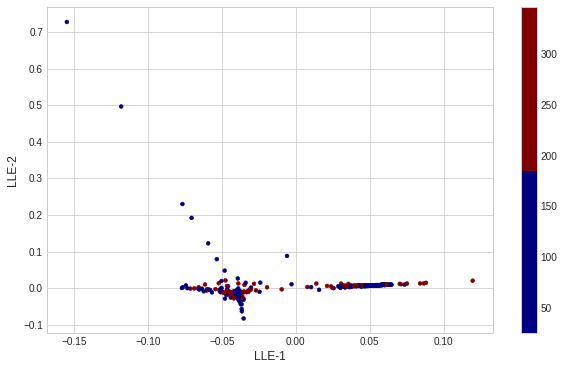

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 2)
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], s = 15,
            cmap = c_map , c = diabetes.target)
plt.colorbar()
plt.xlabel('LLE-1') , plt.ylabel('LLE-2')
plt.show()

# **4) tSNE - t Distributed Stochastic Neighbor Embedding**

In [ ]:
X_embedded = TSNE().fit_transform(df)
X_embedded.shape

(442, 2)

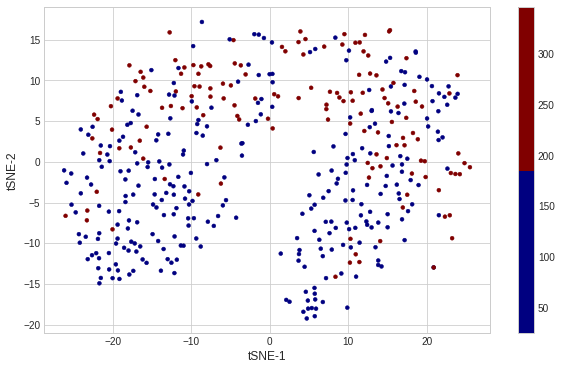

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 2)
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], s = 15,
            cmap = c_map , c = diabetes.target)
plt.colorbar()
plt.xlabel('tSNE-1') , plt.ylabel('tSNE-2')
plt.show()

# **5) ISOMAP - Isometric Mapping**

In [ ]:
embedding = Isomap(n_components = 2)

In [ ]:
X_transformed = embedding.fit_transform(X)

In [ ]:
X_transformed.shape

(442, 2)

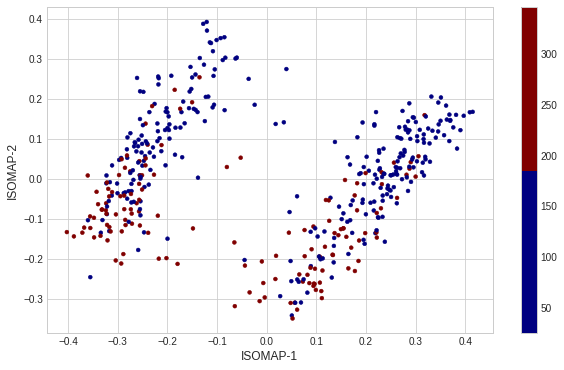

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 2)
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], s = 15,
            cmap = c_map , c = diabetes.target)
plt.colorbar()
plt.xlabel('ISOMAP-1') , plt.ylabel('ISOMAP-2')
plt.show()

# **6) UMAP**

In [ ]:
trans = umap.UMAP(n_neighbors=5, random_state=42).fit(df)

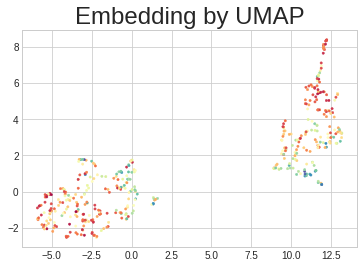

In [ ]:
plt.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s = 5, c = diabetes.target, cmap = 'Spectral')
plt.title('Embedding by UMAP', fontsize=24);

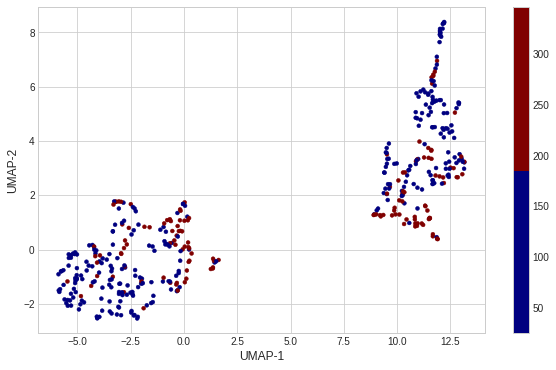

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10, 6))
c_map = plt.cm.get_cmap('jet', 2)
plt.scatter(trans.embedding_[:, 0], trans.embedding_[:, 1], s = 15,
            cmap = c_map , c = diabetes.target)
plt.colorbar()
plt.xlabel('UMAP-1') , plt.ylabel('UMAP-2')
plt.show()

# **Plots of all techniques**

In [ ]:
#Importing the required libraries
from collections import OrderedDict
from functools import partial
from time import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from sklearn.decomposition import PCA

LLE: 0.14 sec
t-SNE: 3 sec
UMAP: 2.6 sec
ISOMAP: 0.096 sec
SVD: 0.0029 sec
PCA: 0.0021 sec


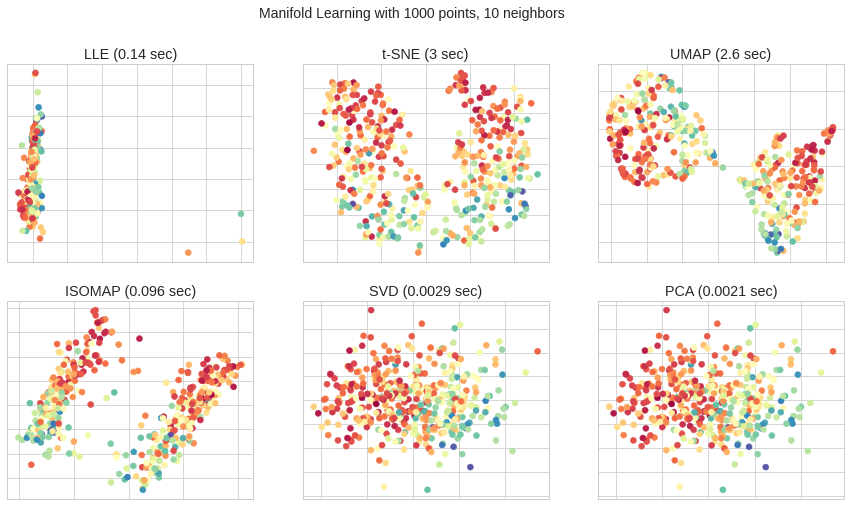

In [ ]:
n_neighbors = 10
n_components = 2
# Creating the plot
fig = plt.figure(figsize=(15, 8))
fig.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)

# Making a dictionary 'methods' containing LLE, t-SNE and PCA
LLE = partial(manifold.LocallyLinearEmbedding,
              n_neighbors, n_components, eigen_solver='auto')
methods = OrderedDict()
methods['LLE'] = LLE(method='standard')
methods['t-SNE'] = manifold.TSNE(n_components=n_components, init='pca',
                                 random_state=0)
methods['UMAP'] = umap.UMAP(random_state=42)
methods['ISOMAP'] = Isomap(n_components = 2)
methods['SVD'] = TruncatedSVD(n_components = 2)
methods['PCA']=PCA(n_components=2)
# Plotting the results
for i, (label, method) in enumerate(methods.items()):
    t0 = time()
    Y = method.fit_transform(df)
    t1 = time()
    print("%s: %.2g sec" % (label, t1 - t0))
    ax = fig.add_subplot(2, 3, i + 1)
    ax.scatter(Y[:, 0], Y[:, 1], c=diabetes.target, cmap=plt.cm.Spectral)
    ax.set_title("%s (%.2g sec)" % (label, t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
  
plt.show()

**Here, for the given dataset UMAP is the best one among all six techniques because more number of datapoints are seperable.**